In [122]:
import math
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **1. Таргет зависит от фичей линейно**

**Искомая зависимость будет y = 2 * x + 5**

In [123]:
def point():
  x = np.random.uniform(-2.5, 2)
  y = 2 * x + 5
  return x, y

*Добавим к данным небольшой разброс*

In [124]:
feature = []
target = []
X = []
y = []

for i in range(50):
  a, b = point()
  feature.append([1, a])
  b_noise = b + np.random.uniform(-0.3, 0.3)
  target.append(b_noise)
  X.append(a)
  y.append(b_noise)

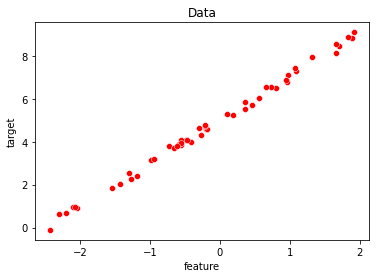

In [125]:
ax = sns.scatterplot(X, y, color = 'r');

ax.set(xlabel ='feature', ylabel ='target')

plt.title('Data');

plt.show()

## **Точный аналитический метод**

In [126]:
X = np.array(feature)
X_transpose = X.transpose()
y = np.array(target)

from numpy import linalg as LA

X_inverse = LA.inv(np.dot(X_transpose, X))
temp_matrix = np.dot(X_inverse, X_transpose)
w = np.dot(temp_matrix, y)

In [127]:
print(w)

[5.04447563 2.02045513]


# **2. Таргет зависит от фичей не линейно**

**Искомая зависимость будет y = sin(x)**

In [128]:
def point():
  x = np.random.uniform(-3, 3)
  y = np.sin(x)
  return x, y

*Добавим к данным небольшой разброс*

In [129]:
feature = []
target = []
X_real = []
y_real = []

for i in range(50):
  a, b = point()
  feature.append([1, a])
  b_noise = b + np.random.uniform(-0.1, 0.1)
  target.append(b_noise)
  X_real.append(a)
  y_real.append(b_noise)

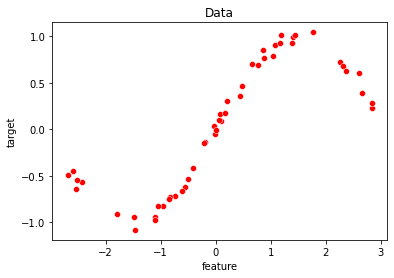

In [130]:
ax = sns.scatterplot(X_real, y_real, color = 'r');

ax.set(xlabel ='feature', ylabel ='target')

plt.title('Data');

plt.show()

In [131]:
X = np.array(feature)
X_transpose = X.transpose()
y = np.array(target)

from numpy import linalg as LA

X_inverse = LA.inv(np.dot(X_transpose, X))
temp_matrix = np.dot(X_inverse, X_transpose)
w = np.dot(temp_matrix, y)

In [132]:
print(w)

[-0.0085405  0.3608739]


In [133]:
def sin_approximation():
  x = np.random.uniform(-3, 3)
  y = w[0] * x + w[1]
  return x, y

In [134]:
X_approximated = []
y_approximated = []

for i in range(50):
  a, b = sin_approximation()
  X_approximated.append(a)
  y_approximated.append(b)

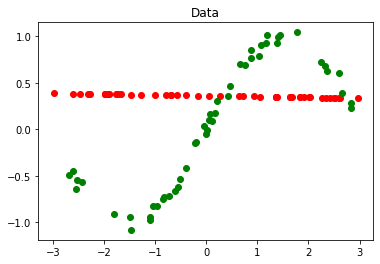

In [135]:
plt.scatter(X_approximated, y_approximated, color = 'r');
plt.scatter(X_real, y_real, color = 'g');


plt.title('Data');

plt.show()

**Линейная регрессия с одним аргументом, нашла что-то среднее в этой диапазоне для синуса. Теперь добавим большее кол-во членов синуса в его разложении по Тейлору**

In [136]:
feature = []
target = []

for i in range(50):
  a, b = point()
  feature.append([a, a**3, a**5, a**7])
  target.append(b)

In [137]:
X = np.array(feature)
X_transpose = X.transpose()
y = np.array(target)

from numpy import linalg as LA

X_inverse = LA.inv(np.dot(X_transpose, X))
temp_matrix = np.dot(X_inverse, X_transpose)
w = np.dot(temp_matrix, target)

In [138]:
w

array([ 9.99598824e-01, -1.65960389e-01,  8.02933410e-03, -1.50031051e-04])

In [139]:
def sin_approximation():
  x = np.random.uniform(-3, 3)
  y = w[0] * x + w[1] * (x**3) + w[2] * (x**5) + w[3] * (x**7) 
  return x, y

In [140]:
X_approximated = []
y_approximated = []

for i in range(50):
  a, b = sin_approximation()
  X_approximated.append(a)
  y_approximated.append(b)

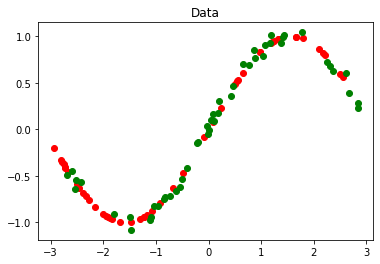

In [141]:
plt.scatter(X_approximated, y_approximated, color = 'r');
plt.scatter(X_real, y_real, color = 'g');


plt.title('Data');

plt.show()